# Task
Analyze the Google Play Store dataset "googleplaystore.csv" to identify strategies for creating successful apps and launching apps with localization.

## Load the data

### Subtask:
Load the Google Play Store dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame.



In [3]:
import pandas as pd

df = pd.read_csv('/Users/jihyunmoon/Desktop/py/모두연/Pandas/mission/데이터해커톤/Google-Playstore.csv')
display(df.head())
df.isnull().sum().sort_values(ascending=False)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

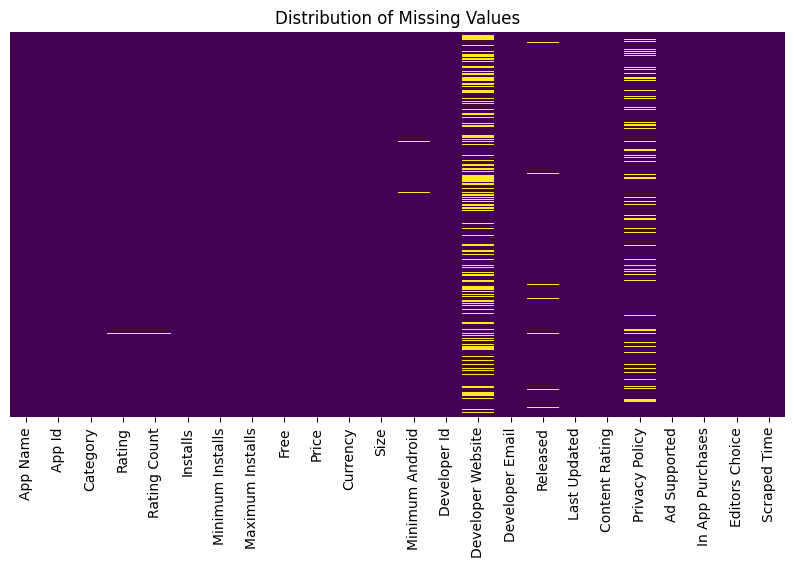

In [4]:
# Create a heatmap to visualize missing values
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Distribution of Missing Values")
plt.show()

**Reasoning**:
The previous attempt to load the file failed because the file was not found in the current directory. I need to check the available files to locate the dataset.



In [5]:
import os
print(os.listdir())

['google_play_1.ipynb', '.DS_Store', 'Google_Play_EDA_Presentation_Korean.pptx', 'sc_발표자료', 'dataton_C1조채라 (1).ipynb', 'Google_Play_EDA_Presentation_tbd.pptx', 'Google-Playstore.csv.zip', '시각화자료', 'import csv.ipynb', 'google_play_01.ipynb', 'Google_Play_EDA_Presentation_Updated.pptx', 'Google_Play_EDA_Presentation_문지현.pptx', 'Cell 51.csv', 'category_rate1.png', 'Datathon1_day1.ipynb', 'distribution_app_size.png', 'google_play_00.ipynb', 'import', 'Google_Play_EDA_Presentation.pptx', 'Google-Playstore.csv', 'AppName_컬럼_나라추출.ipynb']


**Reasoning**:
The previous command showed that the file is named 'Google-Playstore.csv'. I will now load the data using the correct filename.



In [6]:
df = pd.read_csv('Google-Playstore.csv')
display(df.head(20))

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


## Explore and preprocess the data

### Subtask:
Examine the data types, check for missing values, and handle them appropriately. Clean the data by removing duplicates and irrelevant columns.


**Reasoning**:
Display the data types, check for missing values, and handle them. Remove duplicates and irrelevant columns based on the subtask instructions.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [8]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [9]:
# Drop irrelevant columns
df = df.drop(['Minimum Android', 'Minimum Installs'], axis=1)

# Display the updated info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Maximum Installs   int64  
 7   Free               bool   
 8   Price              float64
 9   Currency           object 
 10  Size               object 
 11  Developer Id       object 
 12  Developer Website  object 
 13  Developer Email    object 
 14  Released           object 
 15  Last Updated       object 
 16  Content Rating     object 
 17  Privacy Policy     object 
 18  Ad Supported       bool   
 19  In App Purchases   bool   
 20  Editors Choice     bool   
 21  Scraped Time       object 
dtypes: bool(4), float64(3), int64(1), object(14)
memory usage: 326.5+ MB


In [10]:
# Select object type columns
object_cols = df.select_dtypes(include='object').columns

# Check for null values in object columns
print(df[object_cols].isnull().sum())

App Name                  5
App Id                    0
Category                  0
Installs                107
Currency                135
Size                    196
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Scraped Time              0
dtype: int64


In [11]:
df['Currency'] = df['Currency'].fillna('USD')

In [12]:
print("Unique values in 'Installs' column:")
print(df['Installs'].unique())
print("\nUnique values in 'Currency' column:")
print(df['Currency'].unique())

# Fill missing Developer Id with string 'NaN'
df['Developer Id'] = df['Developer Id'].fillna('NaN')

# Fill missing App Name with string 'NaN'
df['App Name'] = df['App Name'].fillna('NaN')


# Let's check the null counts again to see the changes
print("\nNull counts after filling 'Developer Id', 'Currency', and 'App Name':")
print(df[['App Name', 'Currency', 'Developer Id']].isnull().sum())

Unique values in 'Installs' column:
['10+' '5,000+' '50+' '100+' '1,000+' '500+' '50,000+' '10,000+' '1+'
 '500,000+' '100,000+' '5+' '10,000,000+' '1,000,000+' '5,000,000+' '0+'
 '100,000,000+' nan '50,000,000+' '1,000,000,000+' '500,000,000+'
 '5,000,000,000+' '10,000,000,000+']

Unique values in 'Currency' column:
['USD' 'XXX' 'CAD' 'EUR' 'INR' 'VND' 'GBP' 'BRL' 'KRW' 'TRY' 'RUB' 'SGD'
 'AUD' 'PKR' 'ZAR']

Null counts after filling 'Developer Id', 'Currency', and 'App Name':
App Name        0
Currency        0
Developer Id    0
dtype: int64


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def app_name_length(x):
    if isinstance(x, str):
        return len(x)
    else:
        return 0  # 또는 np.nan

df['App Name Length'] = df['App Name'].apply(app_name_length)

In [14]:
# Check for duplicate rows
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")

# Drop duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows after dropping
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


In [15]:
# Calculate the length of app names
df['App Name Length'] = df['App Name'].apply(len)

# Display the distribution of app name lengths
print("Distribution of App Name Lengths:")
display(df['App Name Length'].describe())
mean_length = df['App Name Length'].mean()
median_length = df['App Name Length'].median()
filtered = df[(df['App Name Length'] > mean_length) & (df['App Name Length'] <= median_length)]
print(f"\n앱 이름 길이가 평균({mean_length:.2f})보다 크고 중앙값({median_length:.2f})보다 작은 앱의 수: {len(filtered)}")
display(filtered['Rating'].describe())
# Optional: Analyze the relationship between app name length and rating (e.g., average rating by name length)
# This might require grouping or binning the name lengths
print("\nAverage Rating by App Name Length:")
display(df.groupby('App Name Length')['Rating'].mean().sort_values(ascending=False).head(50))

Distribution of App Name Lengths:


count    2.312944e+06
mean     2.191872e+01
std      1.196387e+01
min      1.000000e+00
25%      1.300000e+01
50%      1.900000e+01
75%      2.900000e+01
max      5.000000e+01
Name: App Name Length, dtype: float64


앱 이름 길이가 평균(21.92)보다 크고 중앙값(19.00)보다 작은 앱의 수: 0


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Rating, dtype: float64


Average Rating by App Name Length:


App Name Length
50    2.806816
49    2.769548
48    2.743500
47    2.714189
46    2.678388
45    2.644248
43    2.617170
44    2.614242
42    2.581265
30    2.575548
41    2.568651
40    2.542174
39    2.524514
37    2.484504
38    2.481872
29    2.479229
35    2.456548
36    2.454650
34    2.442226
33    2.412339
28    2.406866
32    2.380326
31    2.350208
27    2.339533
26    2.293987
25    2.252258
24    2.202839
23    2.148871
22    2.126937
21    2.124737
20    2.077102
19    2.048642
18    2.040681
10    2.026424
17    2.026319
11    2.018000
6     2.016968
9     2.016527
8     2.007817
7     2.007491
16    2.006404
14    2.002064
5     2.001392
13    2.000692
12    1.999735
15    1.990667
4     1.940059
2     1.914117
3     1.898518
1     1.660000
Name: Rating, dtype: float64

# App Names length와 Rate의 상관관계가 크지 않다. 

In [16]:
# Analyze the relationship between App Name Length and rating
correlation_installs = df['App Name Length'].corr(df['Rating'])
print(f"Correlation between App Name Length and Rating: {correlation_installs:.2f}")



Correlation between App Name Length and Rating: 0.11


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


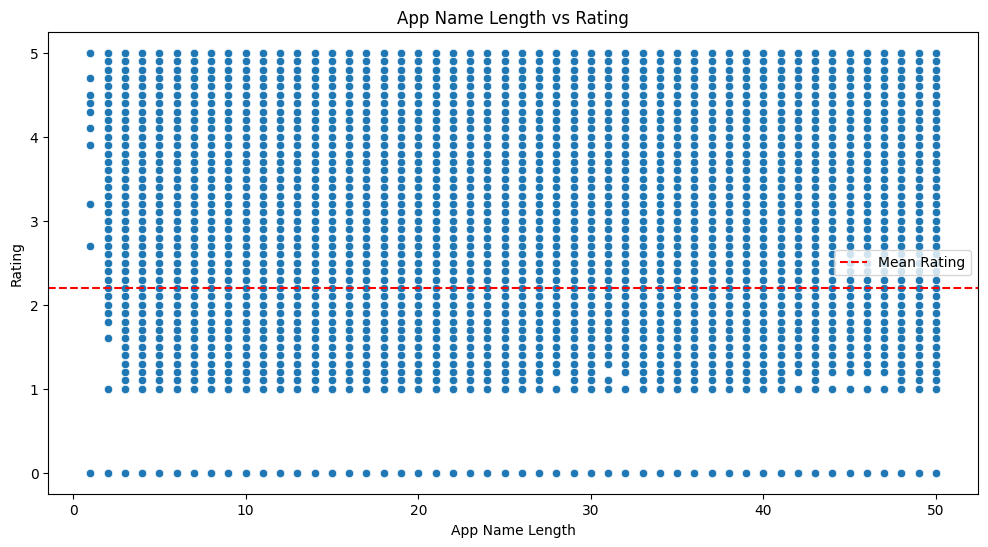

In [17]:
#App Name Length correlation with Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='App Name Length', y='Rating')
plt.title('App Name Length vs Rating')
plt.xlabel('App Name Length')
plt.ylabel('Rating')
plt.axhline(y=df['Rating'].mean(), color='r', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

In [18]:
# Analyze the relationship between App Name Length and Maximum Installs
correlation_installs = df['App Name Length'].corr(df['Maximum Installs'])
print(f"Correlation between App Name Length and Maximum Installs: {correlation_installs:.2f}")


Correlation between App Name Length and Maximum Installs: 0.00


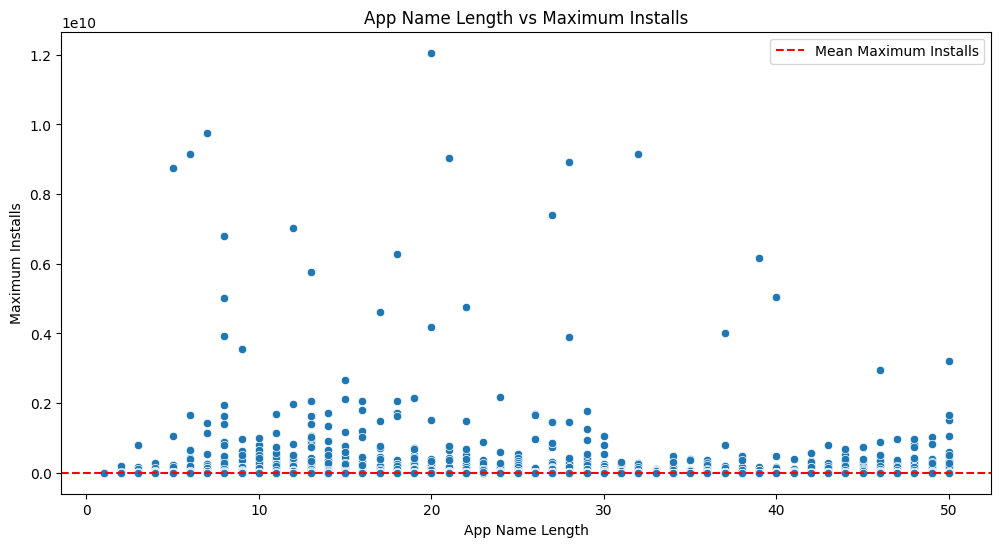

In [19]:
#visualization of App Name Length vs Maximum Installs
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='App Name Length', y='Maximum Installs')
plt.title('App Name Length vs Maximum Installs')
plt.xlabel('App Name Length')
plt.ylabel('Maximum Installs')
plt.axhline(y=df['Maximum Installs'].mean(), color='r', linestyle='--', label='Mean Maximum Installs')
plt.legend()
plt.show()

In [20]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Maximum Installs', 'Free', 'Price', 'Currency', 'Size', 'Developer Id',
       'Developer Website', 'Developer Email', 'Released', 'Last Updated',
       'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Scraped Time', 'App Name Length'],
      dtype='object')

In [21]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,App Name Length
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,15,True,0.0,USD,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,7
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",7662,True,0.0,USD,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,19
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,58,True,0.0,USD,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,6
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,19,True,0.0,USD,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,50
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,478,True,0.0,USD,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,7
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,89,True,0.0,USD,...,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,6
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",2567,True,0.0,USD,...,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35,32
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,702,True,0.0,USD,...,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35,21
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,18,True,0.0,USD,...,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35,9
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",62433,True,0.0,USD,...,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,32


**Reasoning**:
Analyze the distribution of ratings and the number of apps in each category to identify potential trends related to app success. Examine the distribution of app size to see if there are any patterns.

In [22]:
# Analyze the distribution of ratings
print("Distribution of Ratings:")
display(df['Rating'].value_counts(normalize=True).head(10))
# 각 앱의 평균을 전체 평균으로 나눠 그 비율에 대한 비교를 위함.
# Analyze the number of apps in each category
print("\nNumber of Apps in Each Category:")
display(df['Category'].value_counts().head(10))

# Analyze the distribution of app size
print("\nDistribution of App Size:")
display(df['Size'].value_counts().head(10))

Distribution of Ratings:


Rating
0.0    0.462766
5.0    0.043720
4.2    0.038424
4.4    0.037686
4.3    0.036364
4.6    0.034192
4.5    0.033516
4.1    0.030446
4.0    0.029406
4.7    0.027163
Name: proportion, dtype: float64


Number of Apps in Each Category:


Category
Education            241090
Music & Audio        154906
Tools                143988
Business             143771
Entertainment        138276
Lifestyle            118331
Books & Reference    116728
Personalization       89210
Health & Fitness      83510
Productivity          79698
Name: count, dtype: int64


Distribution of App Size:


Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
16M                   42474
15M                   41306
17M                   37244
10M                   34114
18M                   31707
Name: count, dtype: int64

In [23]:
print("Distribution of Ratings:")
display(df['Rating'].value_counts(normalize=True).head())
# 각 앱의 평균을 전체 평균으로 나눠 그 비율에 대한 비교를 위함.각 고유값이 전체 데이터에서 차지하는 비율을 출력
# Analyze the number of apps in each category
print("\nNumber of Apps in Each Category:")
display(df['Category'].value_counts().tail())

# Analyze the distribution of app size
print("\nDistribution of App Size:")
display(df['Size'].value_counts().tail())

Distribution of Ratings:


Rating
0.0    0.462766
5.0    0.043720
4.2    0.038424
4.4    0.037686
4.3    0.036364
Name: proportion, dtype: float64


Number of Apps in Each Category:


Category
Libraries & Demo    5198
Casino              5076
Music               4202
Parenting           3810
Comics              2862
Name: count, dtype: int64


Distribution of App Size:


Size
8.7k    1
784M    1
385M    1
7.6k    1
512M    1
Name: count, dtype: int64

## Data Visualization

### Subtask:
Create visualizations to illustrate key findings, such as the distribution of app categories, ratings, and regional variations in app characteristics.

**Reasoning**:
Visualize the distribution of ratings, categories, and app size using appropriate plots to better understand their distributions and identify potential trends.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


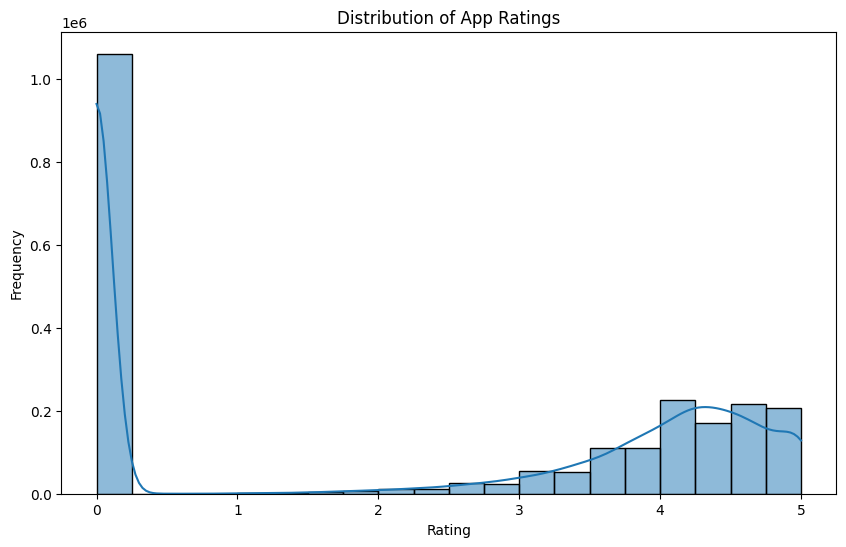

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/588928107.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index[:10], palette='viridis')


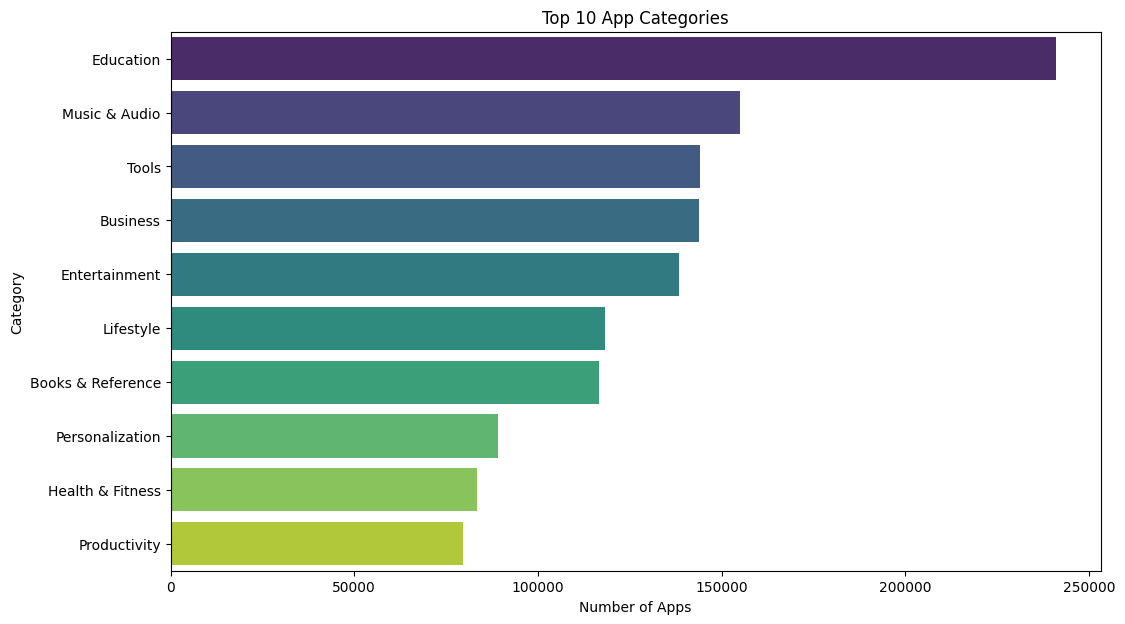

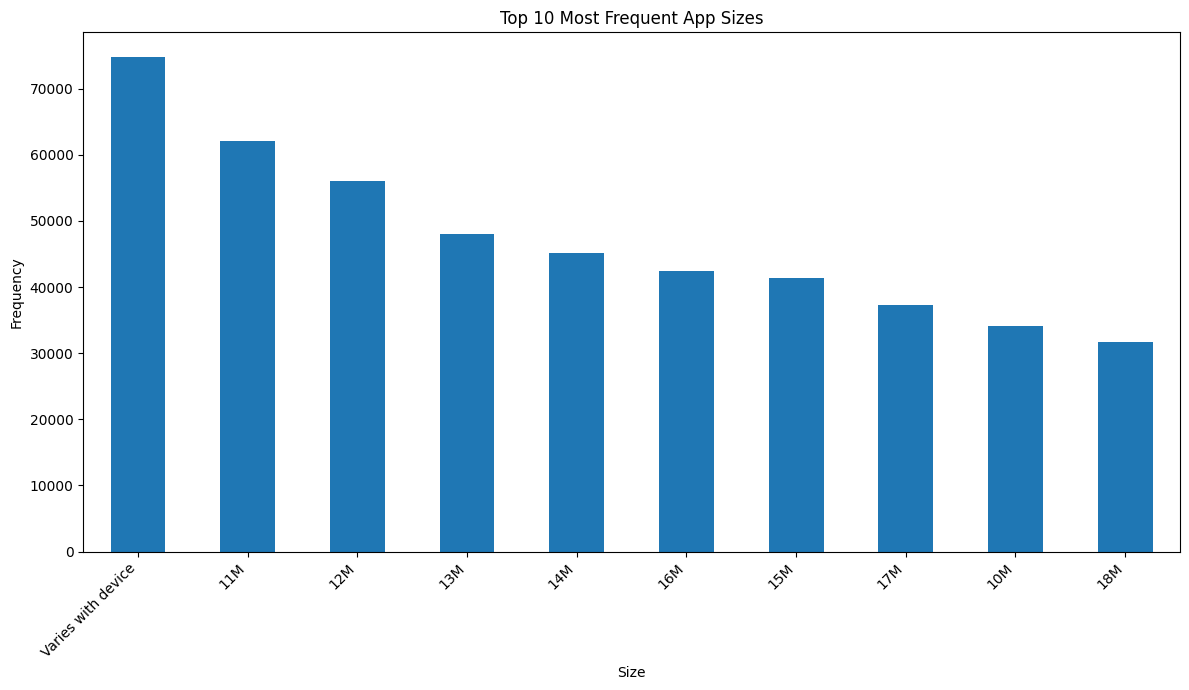

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the top 10 app categories
plt.figure(figsize=(12, 7))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# Visualize the distribution of app size (considering only numeric values and handling 'Varies with device')
# We need to convert 'Size' to numeric first. This might require some data cleaning.
# For simplicity, let's visualize the value counts of the most frequent sizes first.
plt.figure(figsize=(12, 7))
df['Size'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent App Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Clean and convert the 'Size' column to numeric for proper analysis and visualization.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


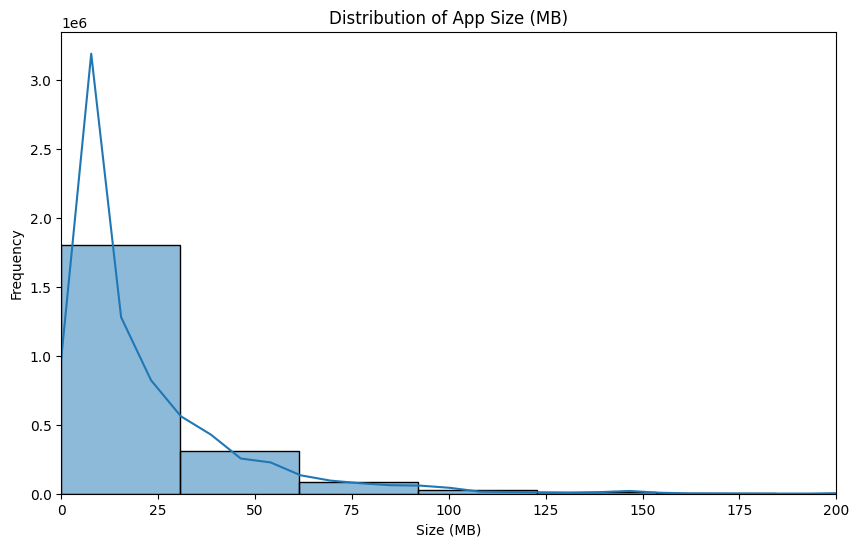

In [25]:
def clean_size(size):
    if isinstance(size, str):
        size = size.replace(',', '')  # Remove commas
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # Convert kilobytes to megabytes
        elif 'G' in size:
             return float(size.replace('G', '')) * 1024 # Convert gigabytes to megabytes
    return None # Handle 'Varies with device' and other non-string values

df['Size_MB'] = df['Size'].apply(clean_size)

# Now visualize the distribution of the cleaned numeric size
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_MB'].dropna(), bins=50, kde=True) # Drop NaN values for plotting
plt.title('Distribution of App Size (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis for better visualization of common sizes
plt.show()

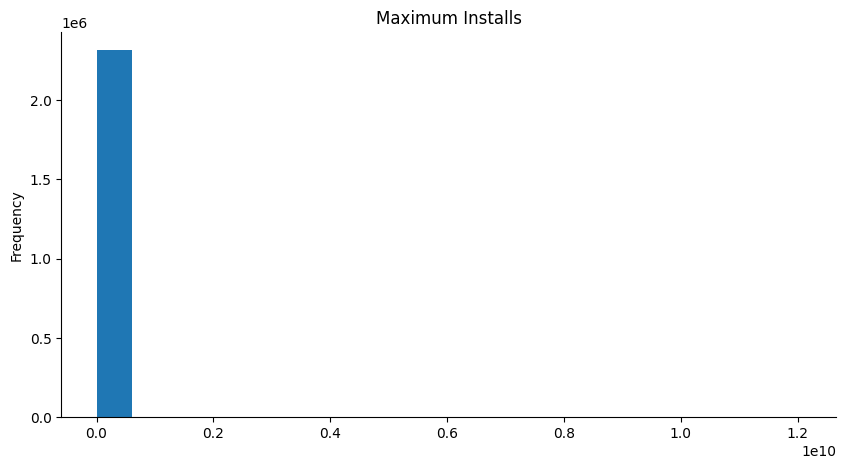

In [26]:
from matplotlib import pyplot as plt
import pandas as pd # Import pandas to use pd.to_numeric

# Convert 'Maximum Installs' to numeric, coercing errors
df['Maximum Installs'] = pd.to_numeric(df['Maximum Installs'], errors='coerce')

df['Maximum Installs'].plot(kind='hist', bins=20, title='Maximum Installs')
plt.gca().spines[['top', 'right',]].set_visible(False)

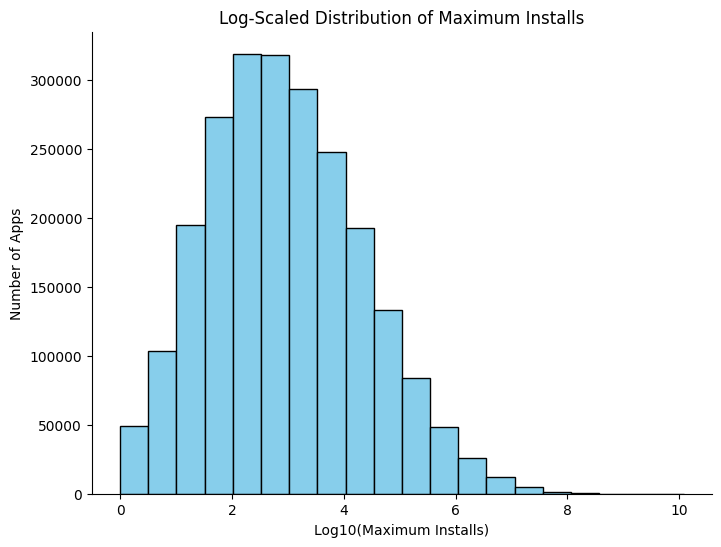

In [27]:

import numpy as np
import matplotlib.pyplot as plt

# 로그 변환 후 시각화 (0 이상 값만)
df_nonzero = df[df['Maximum Installs'] > 0]
log_installs = np.log10(df_nonzero['Maximum Installs'])

plt.figure(figsize=(8, 6))
plt.hist(log_installs, bins=20, color='skyblue', edgecolor='black')
plt.title('Log-Scaled Distribution of Maximum Installs')
plt.xlabel('Log10(Maximum Installs)')
plt.ylabel('Number of Apps')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



In [28]:
# Ensure 'Maximum Installs' is numeric before sorting
# Based on previous analysis, this column might not be numeric
if 'df' in locals() and 'Maximum Installs' in df.columns:
    df['Maximum Installs'] = pd.to_numeric(df['Maximum Installs'], errors='coerce')

    # Sort by Maximum Installs in descending order and get the top 30 app names
    # Drop rows where 'Maximum Installs' is NaN after coercion before sorting
    top_30_apps_by_installs = df.dropna(subset=['Maximum Installs']).sort_values(by='Maximum Installs', ascending=False)['App Name'].head(30)

    print("Top 30 App Names by Maximum Installs:")
    display(top_30_apps_by_installs)
else:
    print("Could not load data or 'Maximum Installs' column not found.")

Top 30 App Names by Maximum Installs:


2155096                                 Google Play services
881403                                               YouTube
1773294                                               Google
1733042                     Google Maps - Navigate & Explore
1060335                                Google Text-to-Speech
944254                          Google Chrome: Fast & Secure
2099458                                                Gmail
2011395                          Android Accessibility Suite
893676                                          Google Drive
2222701                                             Facebook
385470                                    WhatsApp Messenger
167781               Google TV (previously Play Movies & TV)
1830962                                        Google Photos
2095852             Messenger – Text and Video Chat for Free
925338                                              Hangouts
1429623                               Android System WebView
1643722                 

Top 30 App Names by Maximum Installs (excluding specific apps):


2155096                                 Google Play services
1733042                     Google Maps - Navigate & Explore
1060335                                Google Text-to-Speech
944254                          Google Chrome: Fast & Secure
2099458                                                Gmail
2011395                          Android Accessibility Suite
893676                                          Google Drive
385470                                    WhatsApp Messenger
167781               Google TV (previously Play Movies & TV)
1830962                                        Google Photos
2095852             Messenger – Text and Video Chat for Free
925338                                              Hangouts
1429623                               Android System WebView
1643722                                    Google Play Games
1275432                                 Samsung Push Service
2056046                Google Duo - High Quality Video Calls
1108596                 

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/3887164624.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_30_filtered_apps_by_installs, x=df.loc[df['App Name'].isin(top_30_filtered_apps_by_installs), 'Maximum Installs'], palette='viridis')


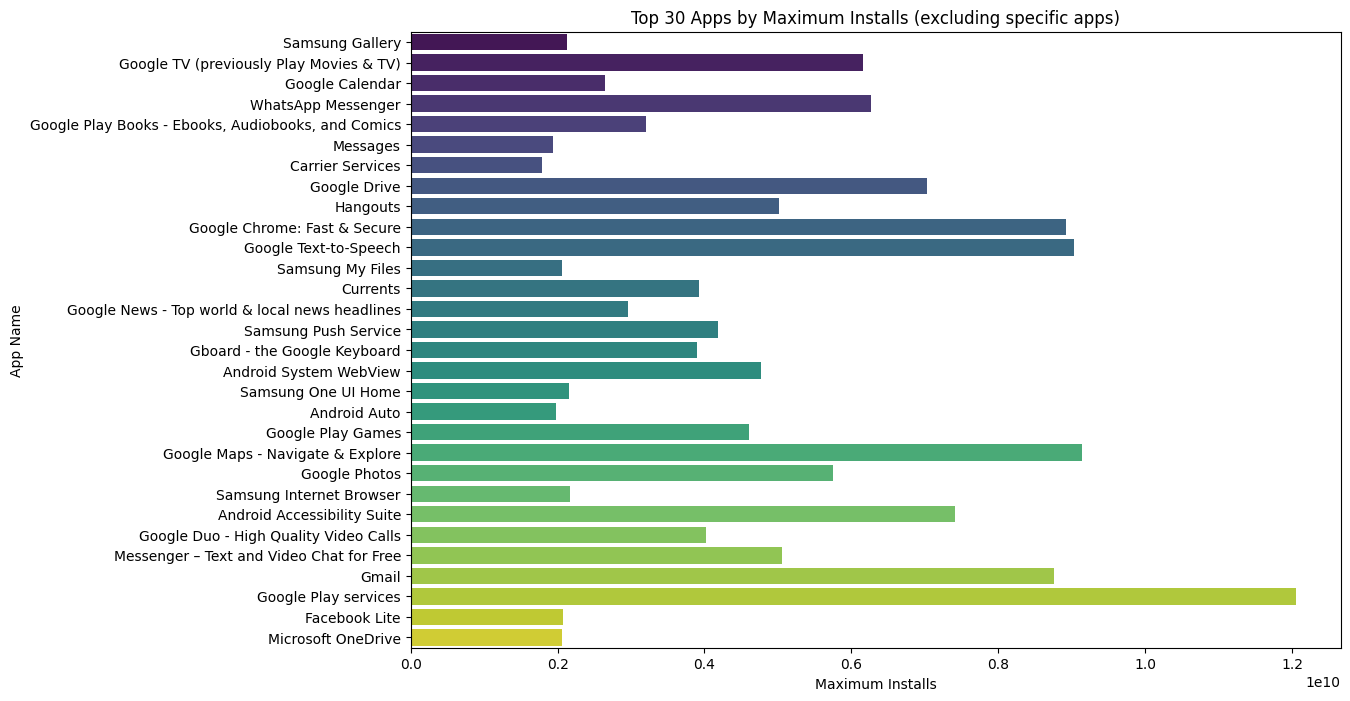

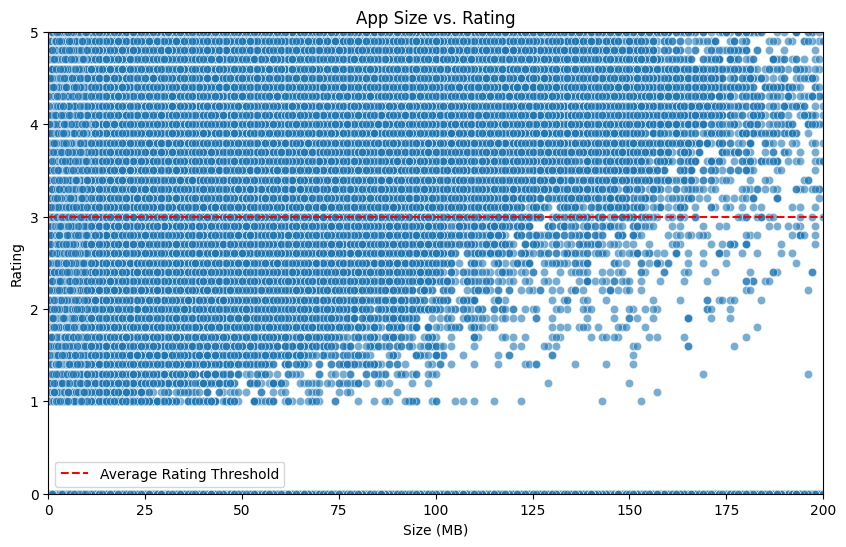

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [34]:
# Samsung, Google, Instagram, Facebook, WhatsApp, YouTube, TikTok, Twitter, Netflix, Spotify를 제외한 나머지 앱으로 다시 순위를 매겨본다. 
# Filter out specific app names
excluded_apps = ['Samsung', 'Google', 'Instagram', 'Facebook', 'WhatsApp', 'YouTube', 'TikTok', 'Twitter', 'Netflix', 'Spotify']
filtered_df = df[~df['App Name'].isin(excluded_apps)]
# Sort by Maximum Installs in descending order and get the top 30 app names
top_30_filtered_apps_by_installs = filtered_df.dropna(subset=['Maximum Installs']).sort_values(by='Maximum Installs', ascending=False)['App Name'].head(30)
print("Top 30 App Names by Maximum Installs (excluding specific apps):")
display(top_30_filtered_apps_by_installs)
# Visualize the top 30 apps by maximum installs
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_filtered_apps_by_installs, x=df.loc[df['App Name'].isin(top_30_filtered_apps_by_installs), 'Maximum Installs'], palette='viridis')
plt.title('Top 30 Apps by Maximum Installs (excluding specific apps)')
plt.xlabel('Maximum Installs')
plt.ylabel('App Name')
plt.show()
# Analyze the relationship between app size and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_MB', y='Rating', data=df, alpha=0.6)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.xlim(0, 200)  # Limit x-axis for better visualization of common sizes
plt.ylim(0, 5)  # Limit y-axis to typical rating range
plt.axhline(y=3, color='r', linestyle='--', label='Average Rating Threshold')
plt.legend()
plt.show()
# Analyze the relationship between app size and maximum installs
plt.figure(figsize=(10, 6))     

In [30]:
# List of app names to exclude prefixes
app_name_prefixes_to_exclude = [
    'Samsung', 'Google', 'Instagram', 'Facebook', 'WhatsApp',
    'YouTube', 'TikTok', 'Twitter', 'Netflix', 'Spotify'
]

# Filter out apps whose names start with any of the excluded prefixes (case-insensitive)
# Ensure the 'App Name' column is treated as string and handle potential NaN values
name_starts_with_filter = df['App Name'].astype(str).str.lower().apply(
    lambda name: any(name.startswith(prefix.lower()) for prefix in app_name_prefixes_to_exclude)
)

filtered_df_ranking = df[~name_starts_with_filter]


# Ensure 'Maximum Installs' is numeric and drop rows with NaN in this column for ranking
filtered_df_ranking['Maximum Installs'] = pd.to_numeric(filtered_df_ranking['Maximum Installs'], errors='coerce')
filtered_df_ranking = filtered_df_ranking.dropna(subset=['Maximum Installs'])


# Sort by Maximum Installs in descending order and display the top apps
print("Top apps by Maximum Installs (excluding apps starting with specified names):")
display(filtered_df_ranking.sort_values(by='Maximum Installs', ascending=False)[['App Name', 'Maximum Installs']].head(30)) # Displaying top 30 as an example

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/367540065.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ranking['Maximum Installs'] = pd.to_numeric(filtered_df_ranking['Maximum Installs'], errors='coerce')


Top apps by Maximum Installs (excluding apps starting with specified names):


,App Name,Maximum Installs
2099458,Gmail,8756574289
2011395,Android Accessibility Suite,7408134567
2095852,Messenger – Text and Video Chat for Free,5054312355
925338,Hangouts,5019518222
1429623,Android System WebView,4764329349
1108596,Currents,3929716163
1366575,Gboard - the Google Keyboard,3897822063
2310951,Microsoft OneDrive,2056017889
1628043,Android Auto,1976625745
606898,Messages,1931517750


In [31]:
# prompt: 10% 상위 앱이름을 축출해보자. 그리고 의미있는 단위로 잘라서 빈도를 분석하자. 

import re
from collections import Counter

# Calculate the threshold for the top 10% of 'Maximum Installs'
install_threshold = df['Maximum Installs'].quantile(0.90)

# Filter the DataFrame to include only apps in the top 10% of installs
top_10_percent_apps = df[df['Maximum Installs'] >= install_threshold].copy()

# Extract app names from the top 10%
top_app_names = top_10_percent_apps['App Name'].dropna().tolist()

# Combine all names into a single string
all_names_string = ' '.join(top_app_names)

# Tokenize the string into words, using a simple regex to split by non-alphanumeric characters
# This helps in splitting names like "App: Name" into "App" and "Name"
words = re.findall(r'\b\w+\b', all_names_string.lower()) # \b ensures full word match

# Count the frequency of each word
word_counts = Counter(words)

# Remove common English stop words and other irrelevant words if necessary
# (Optional: you can add more words to the list below based on your analysis)
stop_words = set([
    'the', 'a', 'an', 'and', 'or', 'of', 'for', 'with', 'in', 'on', 'at', 'by',
    'from', 'to', 'is', 'it', 'you', 'app', 'game', 'free', 'new', 'pro',
    'plus', 'hd', 'live', '2018', 'for', 'with', 'by', 'my', 'your', 'world'
])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words and len(word) > 1}

# Display the most common words (meaningful units) and their frequencies
print("Frequency of meaningful words in the names of top 10% most installed apps:")
display(Counter(filtered_word_counts).most_common(50)) # Display top 50 words as an example

# You can further analyze these words to find common themes or patterns in successful app names.

Frequency of meaningful words in the names of top 10% most installed apps:


[('games', 6801),
 ('photo', 6437),
 ('video', 6191),
 ('simulator', 5303),
 ('3d', 4991),
 ('2021', 4765),
 ('wallpaper', 4246),
 ('car', 3815),
 ('2020', 3392),
 ('maker', 3358),
 ('theme', 3268),
 ('keyboard', 2992),
 ('music', 2975),
 ('english', 2949),
 ('online', 2910),
 ('editor', 2800),
 ('offline', 2494),
 ('mobile', 2463),
 ('tv', 2391),
 ('puzzle', 2259),
 ('kids', 2187),
 ('all', 1968),
 ('call', 1957),
 ('racing', 1950),
 ('love', 1907),
 ('learn', 1881),
 ('chat', 1874),
 ('wallpapers', 1874),
 ('hindi', 1842),
 ('de', 1831),
 ('city', 1783),
 ('player', 1778),
 ('driving', 1744),
 ('بدون', 1707),
 ('truck', 1684),
 ('camera', 1671),
 ('real', 1602),
 ('radio', 1595),
 ('screen', 1468),
 ('news', 1413),
 ('dictionary', 1408),
 ('vpn', 1363),
 ('go', 1357),
 ('status', 1337),
 ('calculator', 1316),
 ('super', 1307),
 ('best', 1293),
 ('baby', 1272),
 ('phone', 1248),
 ('guide', 1248)]

Top 10 Most Frequent App Names by Category:


Category                  
Action    Zombie Shooter      8
          Space War           7
          Space Shooter       6
          Invasion            5
          Ninja Run           4
                             ..
Word      Word Puzzle         7
          Word Search Free    7
          Find Words          7
          Guess The Word      7
          Crosswords          7
Name: App Name, Length: 480, dtype: int64


Visualizing Top App Names for Top Categories:


/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


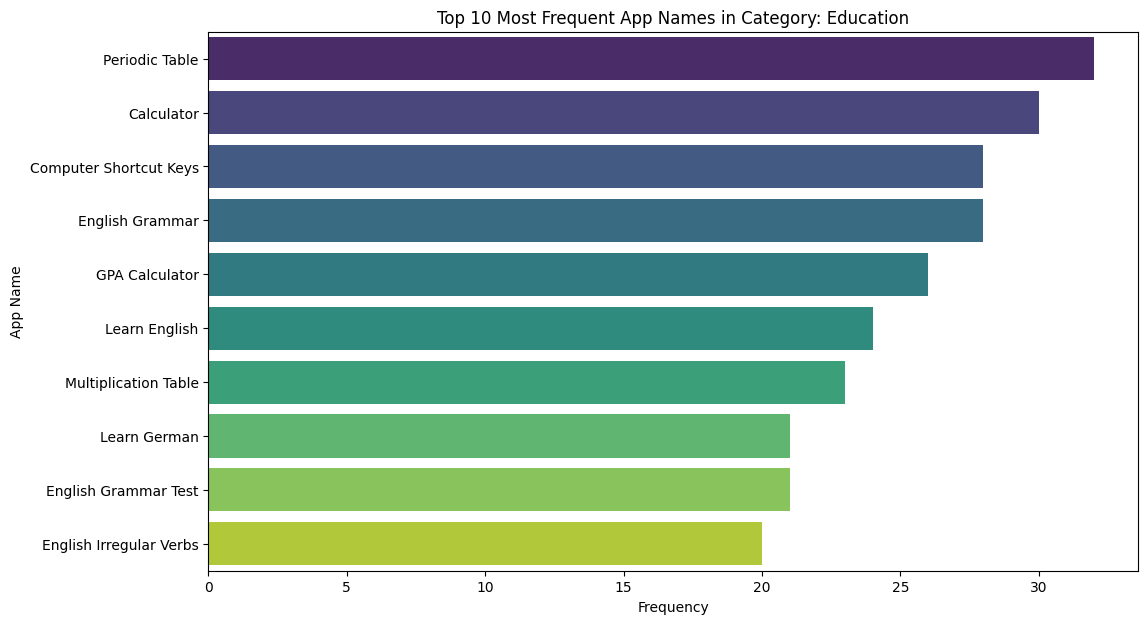

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


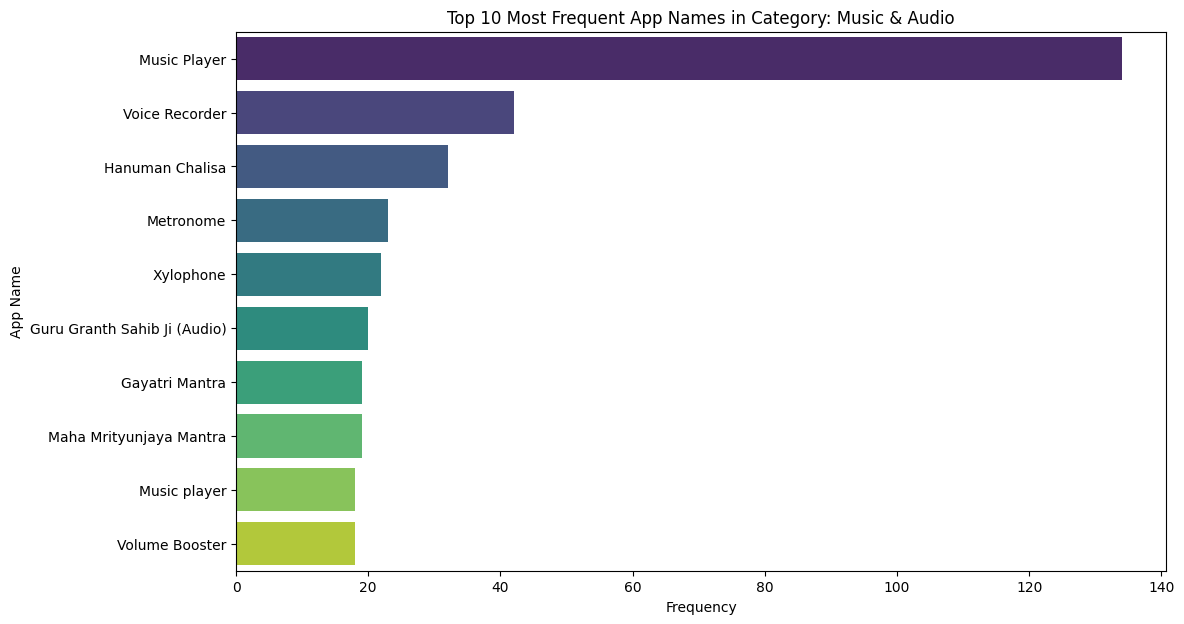

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


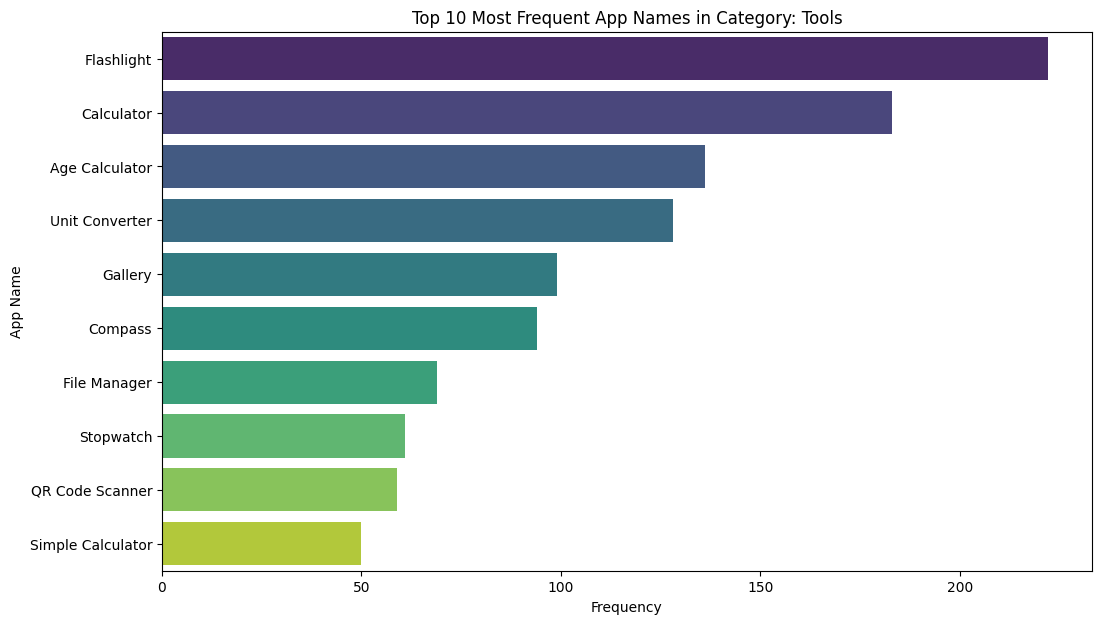

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


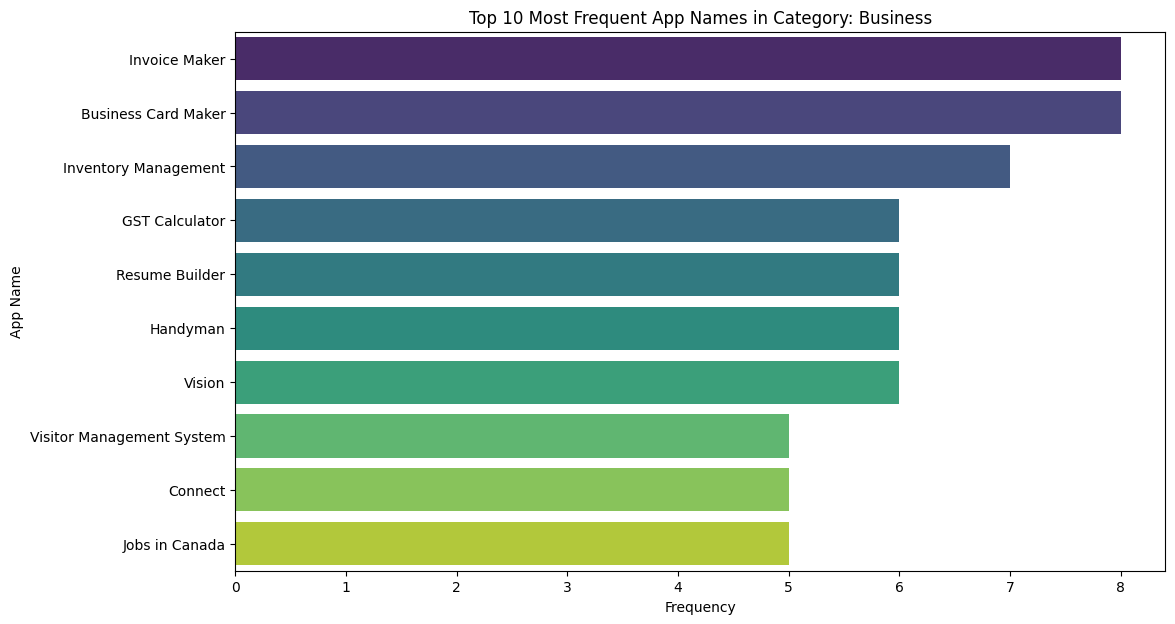

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


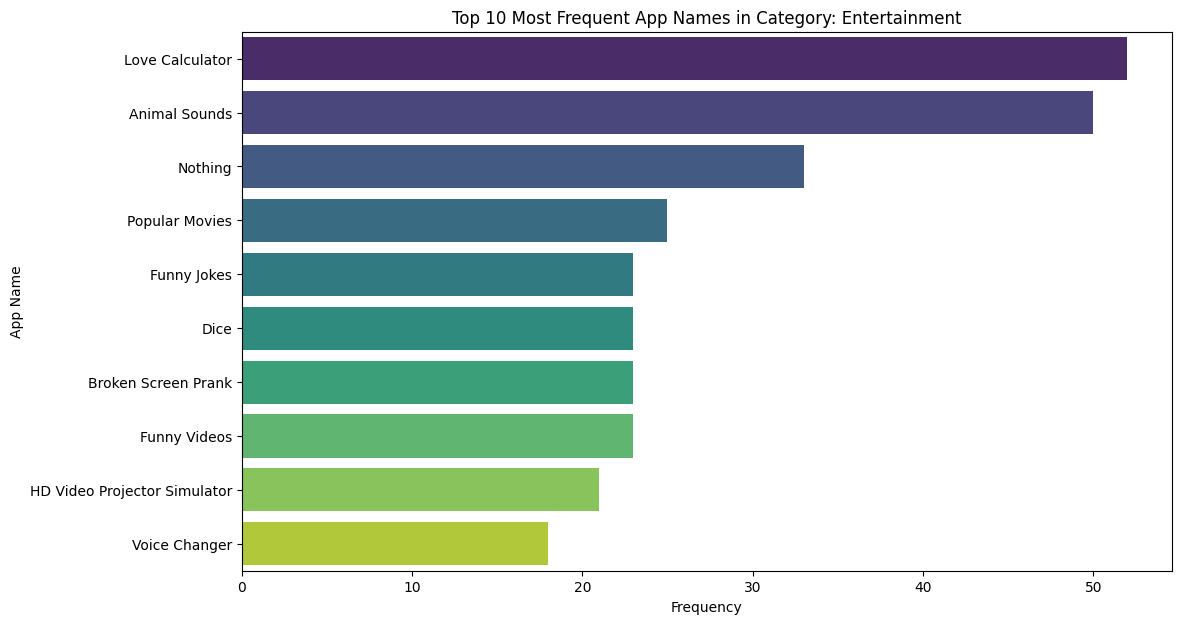

In [32]:
# prompt: Top frequencies of Apps names with visualization by category

# Get the value counts of app names for each category
app_name_counts_by_category = df.groupby('Category')['App Name'].apply(lambda x: x.value_counts().head(10))

print("Top 10 Most Frequent App Names by Category:")
display(app_name_counts_by_category)

# Visualize the top frequencies by category (plotting is tricky for all categories at once)
# Let's pick a few top categories to visualize.

# Get the top categories by number of apps
top_categories = df['Category'].value_counts().head(5).index.tolist()

print("\nVisualizing Top App Names for Top Categories:")

for category in top_categories:
    # Filter data for the current category
    df_category = df[df['Category'] == category]

    # Get the top 10 most frequent app names in this category
    top_app_names_in_category = df_category['App Name'].value_counts().head(10)

    if not top_app_names_in_category.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')
        plt.title(f'Top 10 Most Frequent App Names in Category: {category}')
        plt.xlabel('Frequency')
        plt.ylabel('App Name')
        plt.show()
    else:
        print(f"No app names found for category: {category}")

In [36]:
#  Top frequencies of Apps names of categories
# Get the value counts of app names for each category
app_name_counts_by_category = df.groupby('Category')['App Name'].apply(lambda x: x.value_counts().head(10))
print("Top 10 Most Frequent App Names by Category:")
display(app_name_counts_by_category)
#dataFrame으로 생성

# Convert the Series to a DataFrame for better visualization
app_name_counts_df = app_name_counts_by_category.reset_index()
app_name_counts_df.columns = ['Category', 'App Name', 'Frequency']
# Display the DataFrame
print("\nDataFrame of Top 10 Most Frequent App Names by Category:")
display(app_name_counts_df)

Top 10 Most Frequent App Names by Category:


Category                  
Action    Zombie Shooter      8
          Space War           7
          Space Shooter       6
          Invasion            5
          Ninja Run           4
                             ..
Word      Word Puzzle         7
          Word Search Free    7
          Find Words          7
          Guess The Word      7
          Crosswords          7
Name: App Name, Length: 480, dtype: int64


DataFrame of Top 10 Most Frequent App Names by Category:


,Category,App Name,Frequency
0,Action,Zombie Shooter,8
1,Action,Space War,7
2,Action,Space Shooter,6
3,Action,Invasion,5
4,Action,Ninja Run,4
...,...,...,...
475,Word,Word Puzzle,7
476,Word,Word Search Free,7
477,Word,Find Words,7
478,Word,Guess The Word,7


<Figure size 1200x800 with 0 Axes>

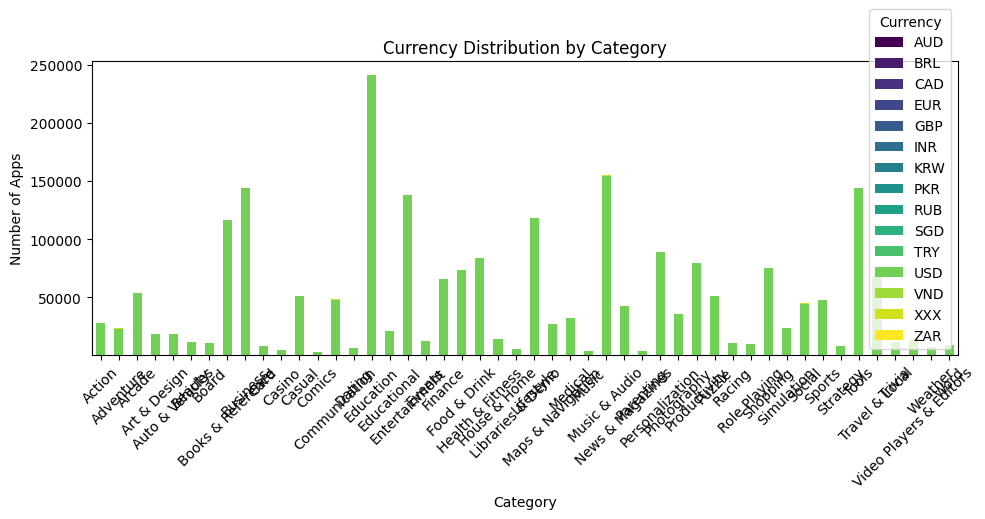

In [33]:
# plan to localization 
# Analyze the distribution of currencies by category
currency_distribution = df.groupby('Category')['Currency'].value_counts().unstack().fillna(0)
# Visualize the currency distribution by category
plt.figure(figsize=(12, 8))
currency_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Currency Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.legend(title='Currency')
plt.tight_layout()
plt.show()


In [38]:
# Analyze the distribution of currencies in the original data
print("Distribution of Currencies (Original Data):")
display(df['Currency'].value_counts())

# List of non-currency values to exclude from the 'Currency' column
non_currency_values = ['2021-06-15 23:59:11', 'Uhitebox.com.ar/', 'False', '3.7M', 'Teen', '0.0'] # Added 'Teen' and '0.0' based on previous outputs

# Filter the DataFrame to exclude rows with these non-currency values in the 'Currency' column
df_filtered_currency = df[~df['Currency'].isin(non_currency_values)].copy()

# Display the distribution of the 'Currency' column in the filtered DataFrame
print("\nDistribution of Currencies after removing non-currency values:")
display(df_filtered_currency['Currency'].value_counts())

# You can now use df_filtered_currency for analysis related to currency distribution

Distribution of Currencies (Original Data):


Currency
USD    2311683
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: count, dtype: int64


Distribution of Currencies after removing non-currency values:


Currency
USD    2311683
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: count, dtype: int64

In [39]:
# prompt: now we will analyze to localization continuously

# There is no specific column in this dataset that directly indicates the region or language an app is localized for.
# The 'Currency' column provides some geographical information for paid apps, but it doesn't cover free apps and doesn't specify the language or content localization.
# To analyze localization strategies thoroughly, a dataset with explicit language/country information per app would be needed.

# However, we can still look at the relationship between currency (as a proxy for region for paid apps) and other app characteristics like rating or category.

# Analyze the average rating for each currency (only for paid apps where currency is relevant)
# Filter for paid apps where currency is not the default 'USD' or 'Free' and not a non-currency value
paid_apps_with_specific_currency = df_filtered_currency[(df_filtered_currency['Price'] != '0') & (df_filtered_currency['Price'] != '0.0') & (df_filtered_currency['Currency'] != 'USD') & (df_filtered_currency['Currency'] != 'Free') & (~df_filtered_currency['Currency'].isin(non_currency_values))].copy()

if not paid_apps_with_specific_currency.empty:
    # Convert 'Price' to numeric after removing currency symbols
    def clean_price(price):
        if isinstance(price, str):
            # Remove currency symbols and commas
            price = price.replace('$', '').replace('â¬', '').replace('Â¥', '').replace(',', '')
            try:
                return float(price)
            except ValueError:
                return None
        return None

    paid_apps_with_specific_currency['Price_Numeric'] = paid_apps_with_specific_currency['Price'].apply(clean_price)

    # Calculate average rating per currency for these paid apps
    average_rating_by_currency = paid_apps_with_specific_currency.groupby('Currency')['Rating'].mean().sort_values(ascending=False)

    print("\nAverage Rating by Currency (for paid apps with specific currencies):")
    display(average_rating_by_currency)

    # Analyze the distribution of categories within different currencies (for paid apps)
    print("\nTop Categories by Currency (for paid apps with specific currencies):")
    for currency in paid_apps_with_specific_currency['Currency'].unique():
        print(f"\nCurrency: {currency}")
        category_counts = paid_apps_with_specific_currency[paid_apps_with_specific_currency['Currency'] == currency]['Category'].value_counts()
        display(category_counts.head())

else:
    print("\nNo paid apps found with specific currencies other than USD.")


# Further analysis on localization would require external data or a dataset with explicit localization information.
# From this dataset, we can infer that app characteristics like category and rating might vary across regions (represented by currency for paid apps).


Average Rating by Currency (for paid apps with specific currencies):


Currency
KRW    5.000000
BRL    4.800000
SGD    4.600000
VND    4.500000
TRY    4.100000
GBP    2.700000
EUR    2.033333
XXX    1.496385
INR    0.500000
AUD    0.000000
CAD    0.000000
ZAR    0.000000
PKR         NaN
RUB         NaN
Name: Rating, dtype: float64


Top Categories by Currency (for paid apps with specific currencies):

Currency: XXX


Category
Education          112
Entertainment      102
Tools               76
Personalization     66
Music & Audio       63
Name: count, dtype: int64


Currency: CAD


Category
Arcade       1
Adventure    1
Name: count, dtype: int64


Currency: EUR


Category
Adventure           1
Educational         1
Trivia              1
Photography         1
Health & Fitness    1
Name: count, dtype: int64


Currency: INR


Category
Health & Fitness    2
Finance             2
Educational         1
Name: count, dtype: int64


Currency: VND


Category
Adventure    1
Name: count, dtype: int64


Currency: GBP


Category
Adventure    1
Business     1
Tools        1
Name: count, dtype: int64


Currency: BRL


Category
Adventure    1
Name: count, dtype: int64


Currency: KRW


Category
Beauty    1
Name: count, dtype: int64


Currency: TRY


Category
Personalization    1
Name: count, dtype: int64


Currency: RUB


Category
Health & Fitness    1
Name: count, dtype: int64


Currency: SGD


Category
Education    1
Name: count, dtype: int64


Currency: AUD


Category
Puzzle    1
Name: count, dtype: int64


Currency: PKR


Category
Puzzle    1
Name: count, dtype: int64


Currency: ZAR


Category
Lifestyle    1
Name: count, dtype: int64

Unique values in 'Free' column: [ True False]

Average Rating and Maximum Installs for Free vs. Paid apps:


,Rating,Maximum Installs
Free,,
False,2.363458,16950.962745
True,2.199950,326228.014760



Distribution of Prices for Paid Apps:


count    45068.000000
mean         5.311701
std         18.115487
min          0.000000
25%          0.990000
50%          1.990000
75%          4.490000
max        400.000000
Name: Price, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


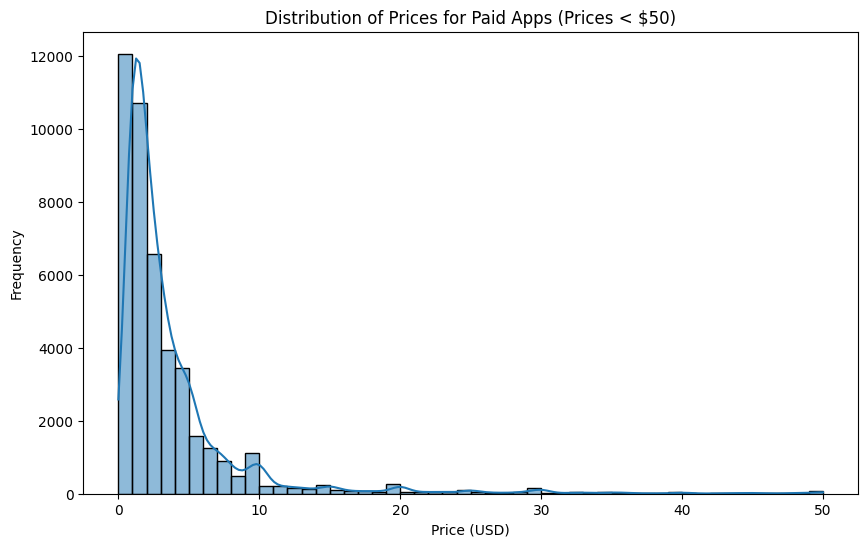

In [40]:
# Compare success metrics for Free vs. Paid apps
# Ensure 'Free' column is boolean or appropriately categorized if not already
# Based on df.info(), 'Free' is an object type, let's check its unique values
print("Unique values in 'Free' column:", df['Free'].unique())

# Assuming 'Free' column contains boolean or string representations of boolean
# Convert 'Free' to boolean if necessary, or group by its current values
# Let's group by the current 'Free' column values first

price_analysis = df.groupby('Free')[['Rating', 'Maximum Installs']].mean()

print("\nAverage Rating and Maximum Installs for Free vs. Paid apps:")
display(price_analysis)

# Optional: Analyze the distribution of prices for paid apps
paid_apps = df[df['Free'] == False]
if not paid_apps.empty:
    print("\nDistribution of Prices for Paid Apps:")
    display(paid_apps['Price'].describe())

    # Visualize the distribution of prices for paid apps (perhaps for prices below a certain threshold for better visualization)
    plt.figure(figsize=(10, 6))
    sns.histplot(paid_apps['Price'][paid_apps['Price'] < 50], bins=50, kde=True) # Example: filter for prices less than 50
    plt.title('Distribution of Prices for Paid Apps (Prices < $50)')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nNo paid apps found in the dataset.")

Correlation between App Name Length and Maximum Installs (excluding 0 ratings): 0.00
Correlation between App Name Length and Maximum Installs (excluding 0 ratings): 0.001880200056611271


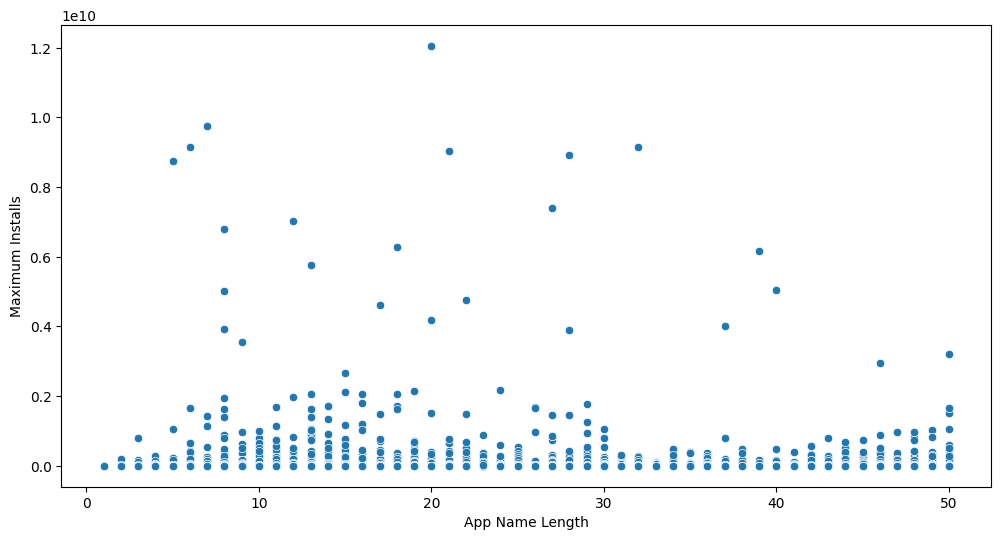

In [42]:
# exclude rate 0% and see Correlation between App Name Length and Maximum Installs:
# Filter out apps with a rating of 0
df_non_zero_rating = df[df['Rating'] > 0]
# Calculate the correlation between App Name Length and Maximum Installs
correlation_non_zero_rating = df_non_zero_rating['App Name Length'].corr(df_non_zero_rating['Maximum Installs'])
print(f"Correlation between App Name Length and Maximum Installs (excluding 0 ratings): {correlation_non_zero_rating:.2f}")
# Visualize the relationship between App Name Length and Maximum Installs for non-zero ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero_rating, x='App Name Length', y='Maximum Installs')     
print("Correlation between App Name Length and Maximum Installs (excluding 0 ratings):", correlation_non_zero_rating)

Correlation between App Name Length and Rating (excluding 0 ratings): 0.03


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


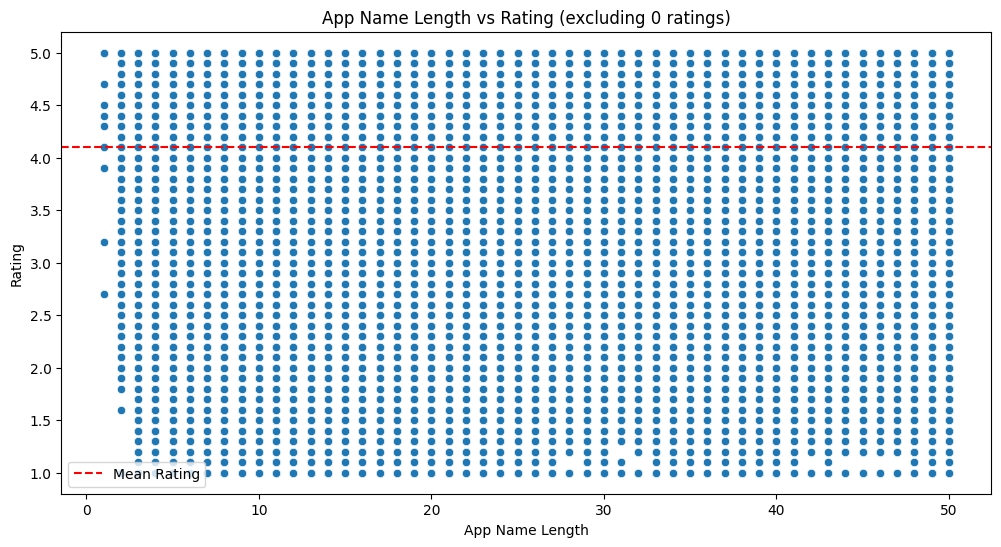

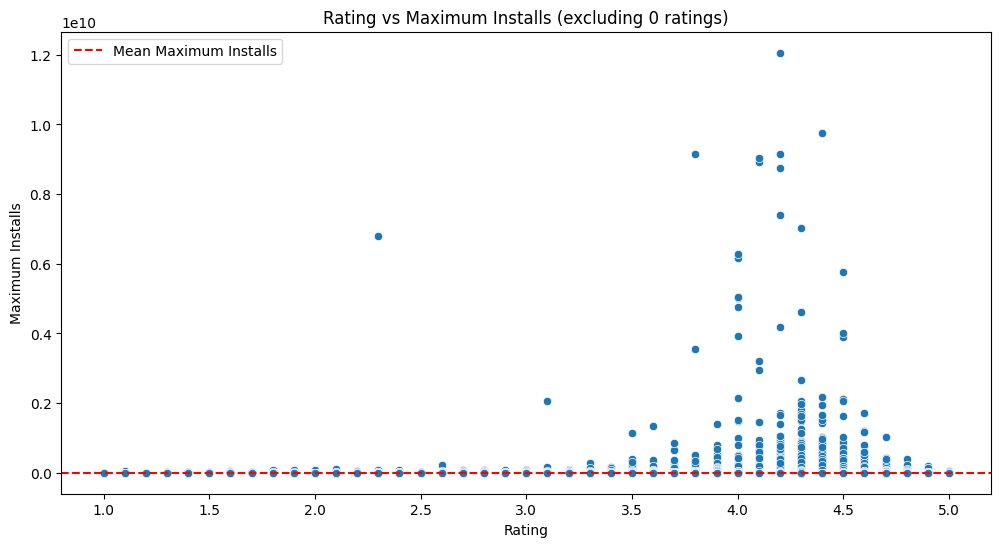

Correlation between Rating and Maximum Installs (excluding 0 ratings): 0.0014988667448064283


In [45]:
#correlation_installs and rating with excluding rating  0
# Filter out apps with a rating of 0
df_non_zero_rating = df[df['Rating'] > 0]
# Calculate the correlation between App Name Length and Rating
correlation_non_zero_rating = df_non_zero_rating['App Name Length'].corr(df_non_zero_rating['Rating'])
print(f"Correlation between App Name Length and Rating (excluding 0 ratings): {correlation_non_zero_rating:.2f}")
# Visualize the relationship between App Name Length and Rating for non-zero ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero_rating, x='App Name Length', y='Rating')
plt.title('App Name Length vs Rating (excluding 0 ratings)')
plt.xlabel('App Name Length')
plt.ylabel('Rating')
plt.axhline(y=df_non_zero_rating['Rating'].mean(), color='r', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()
# Analyze the relationship between rating and Maximum Installs for non-zero ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero_rating, x='Rating', y='Maximum Installs')
plt.title('Rating vs Maximum Installs (excluding 0 ratings)')
plt.xlabel('Rating')
plt.ylabel('Maximum Installs')
plt.axhline(y=df_non_zero_rating['Maximum Installs'].mean(), color='r', linestyle='--', label='Mean Maximum Installs')
plt.legend()
plt.show()
print("Correlation between Rating and Maximum Installs (excluding 0 ratings):", df_non_zero_rating['Rating'].corr(df_non_zero_rating['Maximum Installs']))

Top 10 Most Frequent App Names by Category:


Category                  
Action    Zombie Shooter      8
          Space War           7
          Space Shooter       6
          Invasion            5
          Ninja Run           4
                             ..
Word      Word Puzzle         7
          Word Search Free    7
          Find Words          7
          Guess The Word      7
          Crosswords          7
Name: App Name, Length: 480, dtype: int64


Visualizing Top App Names for Top Categories:


/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


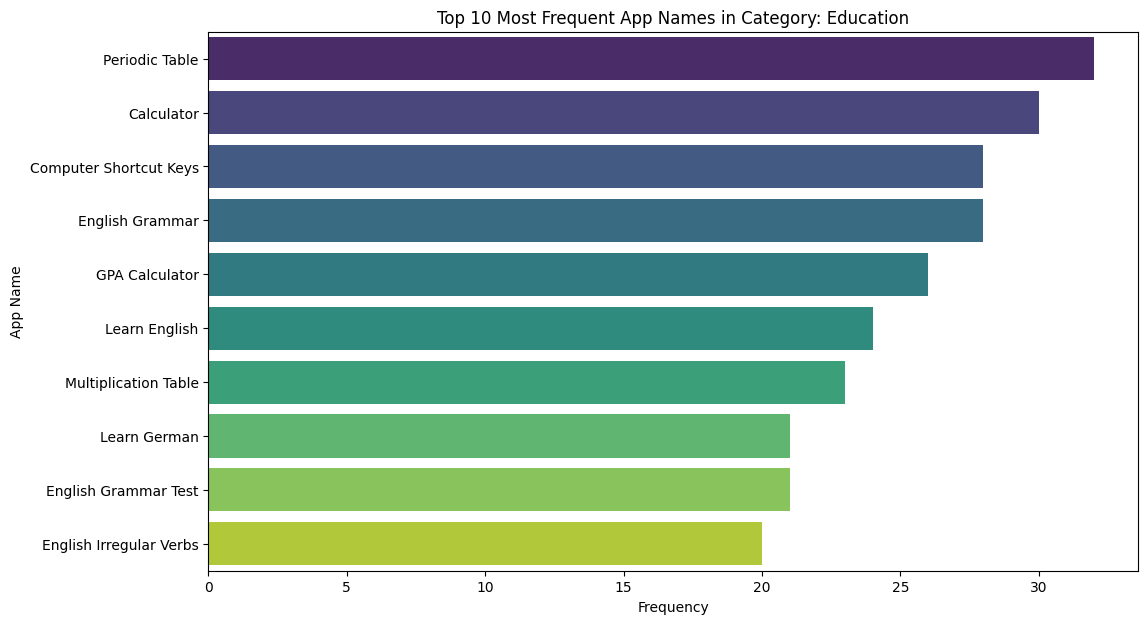

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


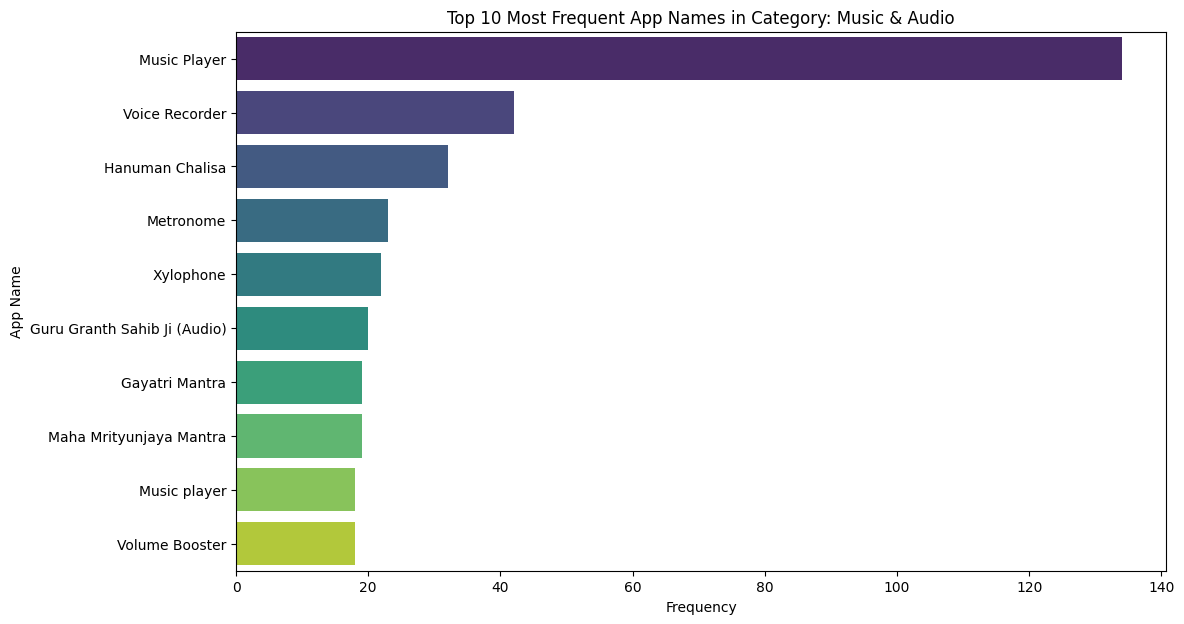

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


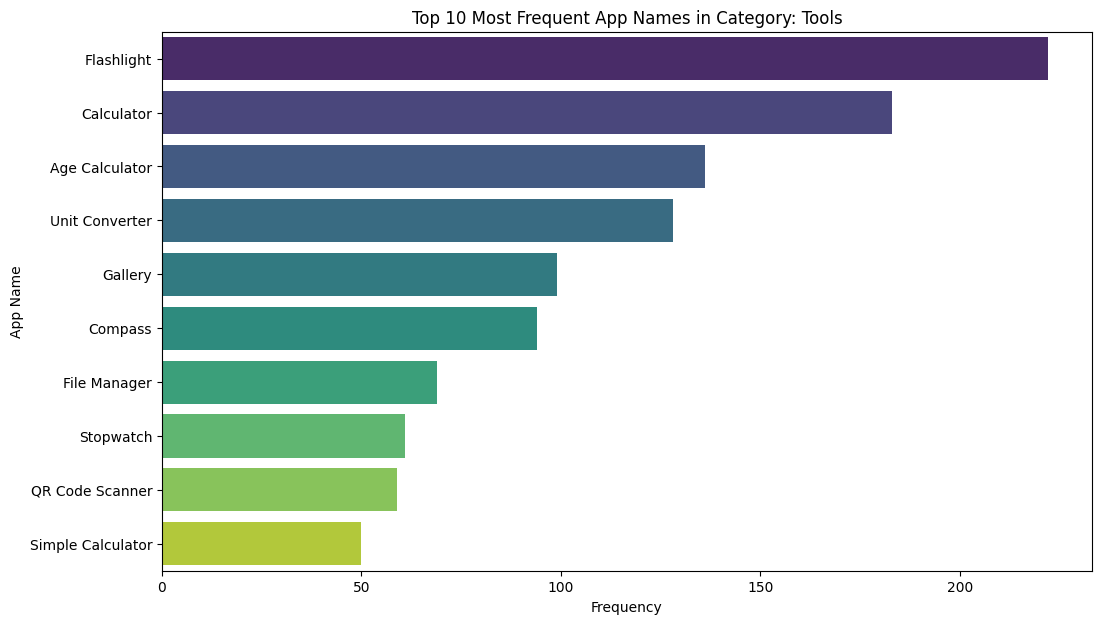

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


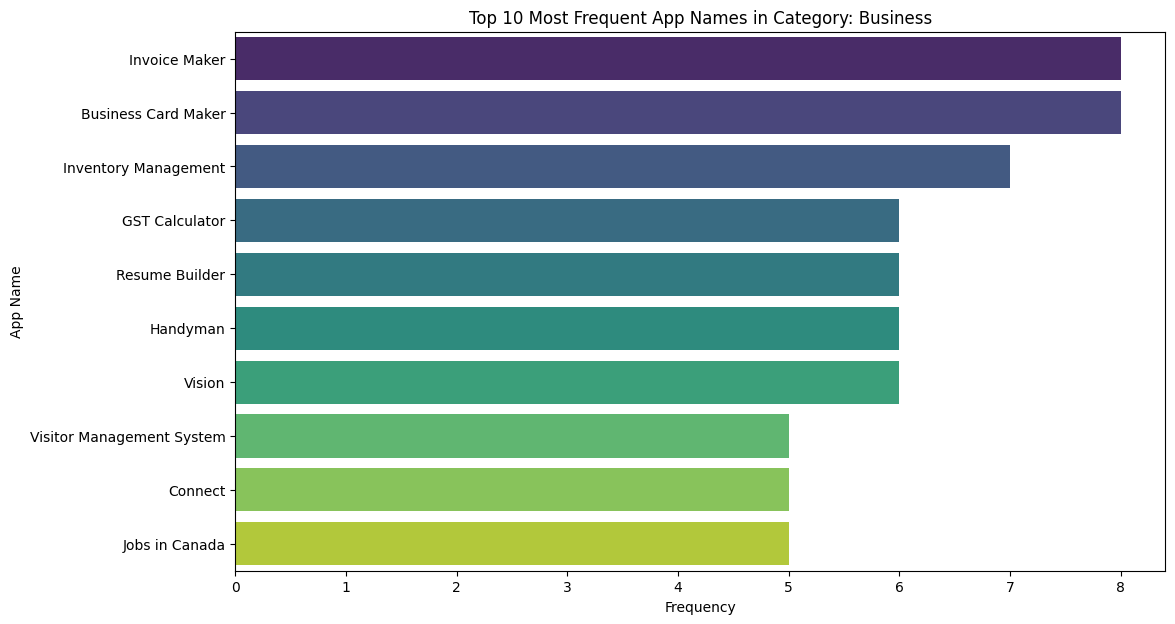

/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_12874/1041847967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')


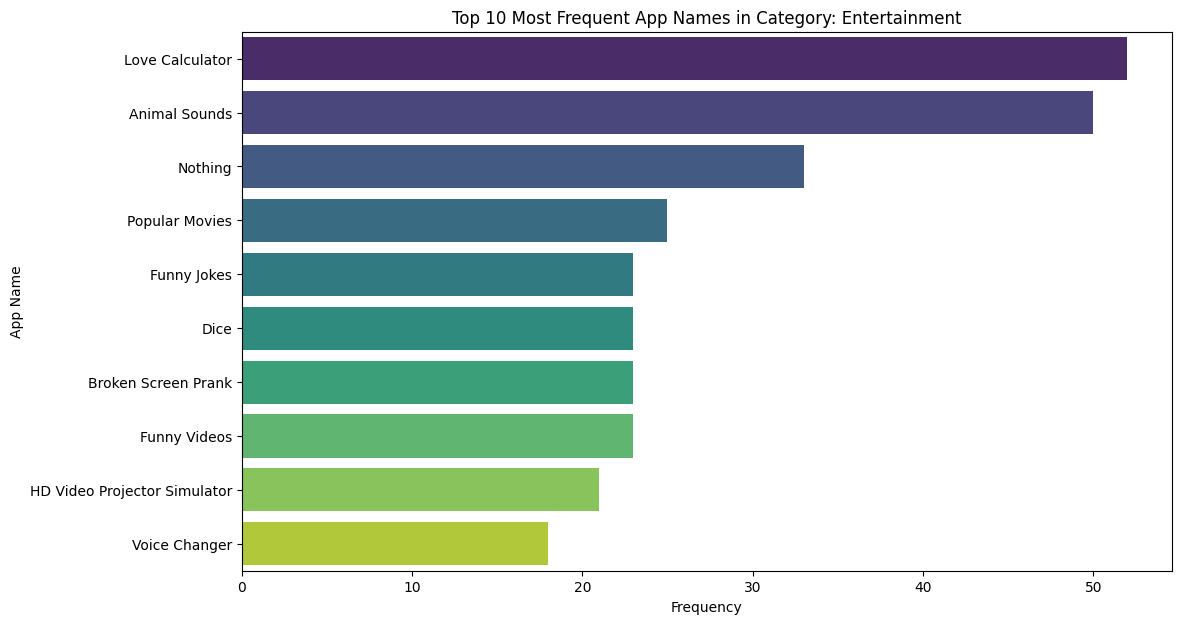

In [46]:
# prompt: Top frequencies of Apps names with visualization by category

# Get the value counts of app names for each category
app_name_counts_by_category = df.groupby('Category')['App Name'].apply(lambda x: x.value_counts().head(10))

print("Top 10 Most Frequent App Names by Category:")
display(app_name_counts_by_category)

# Visualize the top frequencies by category (plotting is tricky for all categories at once)
# Let's pick a few top categories to visualize.

# Get the top categories by number of apps
top_categories = df['Category'].value_counts().head(5).index.tolist()

print("\nVisualizing Top App Names for Top Categories:")

for category in top_categories:
    # Filter data for the current category
    df_category = df[df['Category'] == category]

    # Get the top 10 most frequent app names in this category
    top_app_names_in_category = df_category['App Name'].value_counts().head(10)

    if not top_app_names_in_category.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(x=top_app_names_in_category.values, y=top_app_names_in_category.index, palette='viridis')
        plt.title(f'Top 10 Most Frequent App Names in Category: {category}')
        plt.xlabel('Frequency')
        plt.ylabel('App Name')
        plt.show()
    else:
        print(f"No app names found for category: {category}")

<Figure size 1200x800 with 0 Axes>

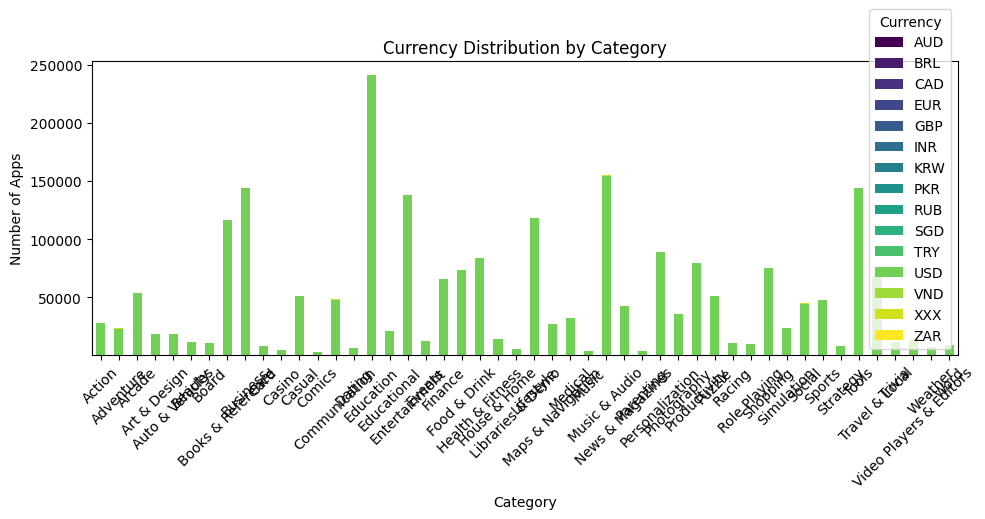

In [47]:
# plan to localization 
# Analyze the distribution of currencies by category
currency_distribution = df.groupby('Category')['Currency'].value_counts().unstack().fillna(0)
# Visualize the currency distribution by category
plt.figure(figsize=(12, 8))
currency_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Currency Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.legend(title='Currency')
plt.tight_layout()
plt.show()
